In [1]:
import pandas as pd
import numpy as np
import re, os
from string import printable
from sklearn import model_selection
import tensorflow as tf
from keras.models import Sequential, Model, model_from_json, load_model
from keras import regularizers
from keras.layers.core import Dense, Dropout, Activation, Lambda, Flatten
from keras.layers import Input, ELU, LSTM, Embedding, Convolution2D, MaxPooling2D, \
BatchNormalization, Convolution1D, MaxPooling1D, concatenate
from keras.preprocessing import sequence
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras import backend as K
from pathlib import Path
import json
import warnings
import matplotlib.pyplot as plt
from keras.layers import Bidirectional, SimpleRNN
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard, ModelCheckpoint

warnings.filterwarnings("ignore")

Using TensorFlow backend.



## Deep Learning 


Requirements:

- tensorflow 1.4.1
- keras 2.1.2


## Preprocess 

In [2]:
## Load data code_snippet
DATA_HOME = 'RNN Multi-Class Classification/'
Al_Boghdady_Multi_Class_Dataset = pd.read_csv('Al_Boghdady_Multi_Class.csv', encoding= 'unicode_escape')
Al_Boghdady_Multi_Class_Dataset.sample(n=5).head(5) 

,code,isMalicious
2294,"printf ( fmt , i->id.c_str ( ) , comm.c_s...",37
2972,Segment ( ) { startAddrName = 0 ; len_V...,2
4144,staticvoid G2 ( ) { if ( 1 ) { { ...,0
4470,staticvoid GG2B2 ( ) { char * data_value...,0
444,CHECK_RESULT ( ecc_mul_start ( state -> secr...,7


In [3]:
#Dataset Shape
Al_Boghdady_Multi_Class_Dataset.shape

(5080, 2)

In [4]:
# Checking for duplicate rows or null values
Al_Boghdady_Multi_Class_Dataset.dropna(inplace=True)
Al_Boghdady_Multi_Class_Dataset.drop_duplicates(inplace=True)
Al_Boghdady_Multi_Class_Dataset.sample(n=5).head(5) 

,code,isMalicious
4597,staticvoid GB2G1 ( ) { char * data ; dat...,0
1603,char itoa_str4 [ 8 ] ;,28
878,if ( int _num < 4 ) { EICRA & = ~ ( 0x3...,15
2548,void manipulate_stringaValue ( char * string )...,42
3906,staticvoid G1 ( ) { if ( 5!= 5 ) { ...,0


In [5]:
#Dataset Shape
Al_Boghdady_Multi_Class_Dataset.shape

(4774, 2)

In [6]:
#Dataset tokenization
code_snippet_int_tokens = [[printable.index(x) + 1 for x in code_snippet if x in printable] 
                           for code_snippet in Al_Boghdady_Multi_Class_Dataset.code]
max_len = 150
X = sequence.pad_sequences(code_snippet_int_tokens, maxlen=max_len)
target = np.array (Al_Boghdady_Multi_Class_Dataset.isMalicious)
print('Matrix dimensions of X: ', X.shape, 'Vector dimension of target: ', target.shape)

Matrix dimensions of X:  (4774, 150) Vector dimension of target:  (4774,)


In [7]:
#Split the data set into training and test data
X_train, X_test, target_train, target_test = model_selection.train_test_split(X, target, test_size=0.30, random_state=30)

In [8]:
# Layer dimensions
def print_layers_dims(model):
    l_layers = model.layers
    # Note None is ALWAYS batch_size
    for i in range(len(l_layers)):
        print(l_layers[i])
        print('Input Shape: ', l_layers[i].input_shape, 'Output Shape: ', l_layers[i].output_shape)

#Save model to disk
def save_model(fileModelJSON,fileWeights):
    #print("Saving model to disk: ",fileModelJSON,"and",fileWeights)
    #have h5py installed
    if Path(fileModelJSON).is_file():
        os.remove(fileModelJSON)
    json_string = model.to_json()
    with open(fileModelJSON,'w' ) as f:
        json.dump(json_string, f)
    if Path(fileWeights).is_file():
        os.remove(fileWeights)
    model.save_weights(fileWeights)
    

#Load model from disk
def load_model(fileModelJSON,fileWeights):
    #print("Saving model to disk: ",fileModelJSON,"and",fileWeights)
    with open(fileModelJSON, 'r') as f:
         model_json = json.load(f)
         model = model_from_json(model_json)
    
    model.load_weights(fileWeights)
    return model

In [9]:
# RNN Model for Multi-Class Classification
# Main Input
main_input = Input(shape=(max_len,),dtype='int32')

# Embeding Layer
Emb_Layer = Embedding(input_dim=150, output_dim=32, input_length=150, W_regularizer=regularizers.l2(1e-4))(main_input) 
Emb_Layer = Bidirectional(SimpleRNN(150, return_sequences=False, dropout=0, recurrent_dropout=0))(Emb_Layer)
Emb_Layer = Dense(55, activation='softmax')(Emb_Layer)

# RNN Model Settings
RNN_model = Model(inputs=main_input, outputs=Emb_Layer)
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
RNN_model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
RNN_model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 32)           4800      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               54900     
_________________________________________________________________
dense_1 (Dense)              (None, 55)                16555     
Total params: 76,255
Trainable params: 76,255
Non-trainable params: 0
_________________________________________________________________


Epoch 1/800
3341/3341 [==============================] - 5s 1ms/step - loss: 3.4419 - acc: 0.3107
Epoch 2/800
3341/3341 [==============================] - 5s 1ms/step - loss: 3.0750 - acc: 0.3502
Epoch 3/800
3341/3341 [==============================] - 5s 2ms/step - loss: 2.9724 - acc: 0.3511
Epoch 4/800
3341/3341 [==============================] - 6s 2ms/step - loss: 2.8751 - acc: 0.3556
Epoch 5/800
3341/3341 [==============================] - 6s 2ms/step - loss: 2.8236 - acc: 0.3682
Epoch 6/800
3341/3341 [==============================] - 6s 2ms/step - loss: 2.8098 - acc: 0.3762
Epoch 7/800
3341/3341 [==============================] - 6s 2ms/step - loss: 2.7545 - acc: 0.3852
Epoch 8/800
3341/3341 [==============================] - 6s 2ms/step - loss: 2.7410 - acc: 0.3858
Epoch 9/800
3341/3341 [==============================] - 6s 2ms/step - loss: 2.6897 - acc: 0.3936
Epoch 10/800
3341/3341 [==============================] - 6s 2ms/step - loss: 2.6681 - acc: 0.3921
Epoch 11/800
3341/3

3341/3341 [==============================] - 5s 2ms/step - loss: 1.2602 - acc: 0.7049
Epoch 84/800
3341/3341 [==============================] - 8s 2ms/step - loss: 1.2424 - acc: 0.7112
Epoch 85/800
3341/3341 [==============================] - 5s 2ms/step - loss: 1.2329 - acc: 0.7154
Epoch 86/800
3341/3341 [==============================] - 7s 2ms/step - loss: 1.2554 - acc: 0.7049
Epoch 87/800
3341/3341 [==============================] - 7s 2ms/step - loss: 1.2075 - acc: 0.7172A: 0s - loss: 1.2109 - acc: 0.7
Epoch 88/800
3341/3341 [==============================] - 5s 2ms/step - loss: 1.1917 - acc: 0.7246
Epoch 89/800
3341/3341 [==============================] - 8s 2ms/step - loss: 1.2114 - acc: 0.7177
Epoch 90/800
3341/3341 [==============================] - 5s 1ms/step - loss: 1.2031 - acc: 0.7198
Epoch 91/800
3341/3341 [==============================] - 7s 2ms/step - loss: 1.1552 - acc: 0.7288
Epoch 92/800
3341/3341 [==============================] - 7s 2ms/step - loss: 1.1609 - acc:

3341/3341 [==============================] - 7s 2ms/step - loss: 0.8132 - acc: 0.7971
Epoch 165/800
3341/3341 [==============================] - 5s 2ms/step - loss: 0.7064 - acc: 0.8360
Epoch 166/800
3341/3341 [==============================] - 8s 2ms/step - loss: 0.7308 - acc: 0.8279
Epoch 167/800
3341/3341 [==============================] - 5s 1ms/step - loss: 0.7017 - acc: 0.8363
Epoch 168/800
3341/3341 [==============================] - 7s 2ms/step - loss: 0.6664 - acc: 0.8450
Epoch 169/800
3341/3341 [==============================] - 7s 2ms/step - loss: 0.6707 - acc: 0.8414
Epoch 170/800
3341/3341 [==============================] - 5s 2ms/step - loss: 0.7149 - acc: 0.8309
Epoch 171/800
3341/3341 [==============================] - 8s 3ms/step - loss: 0.6682 - acc: 0.8474
Epoch 172/800
3341/3341 [==============================] - 5s 1ms/step - loss: 0.6466 - acc: 0.8485
Epoch 173/800
3341/3341 [==============================] - 7s 2ms/step - loss: 0.6570 - acc: 0.8459
Epoch 174/800


3341/3341 [==============================] - 5s 1ms/step - loss: 0.4260 - acc: 0.9072
Epoch 245/800
3341/3341 [==============================] - 7s 2ms/step - loss: 0.4183 - acc: 0.9069
Epoch 246/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.4106 - acc: 0.9066A: 3s - l
Epoch 247/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.4025 - acc: 0.9063
Epoch 248/800
3341/3341 [==============================] - 8s 2ms/step - loss: 0.5058 - acc: 0.8773
Epoch 249/800
3341/3341 [==============================] - 5s 1ms/step - loss: 0.4775 - acc: 0.8866
Epoch 250/800
3341/3341 [==============================] - 7s 2ms/step - loss: 0.4270 - acc: 0.8982
Epoch 251/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.3922 - acc: 0.9084
Epoch 252/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.4056 - acc: 0.9060
Epoch 253/800
3341/3341 [==============================] - 8s 2ms/step - loss: 0.4949 - acc: 0.8782
Epoch

3341/3341 [==============================] - 6s 2ms/step - loss: 0.2780 - acc: 0.9318
Epoch 326/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.2829 - acc: 0.9348
Epoch 327/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.2476 - acc: 0.9449
Epoch 328/800
3341/3341 [==============================] - 7s 2ms/step - loss: 0.2440 - acc: 0.9428
Epoch 329/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.2224 - acc: 0.9521
Epoch 330/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.2232 - acc: 0.9509
Epoch 331/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.2697 - acc: 0.9392
Epoch 332/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.2284 - acc: 0.9521
Epoch 333/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.2598 - acc: 0.9353
Epoch 334/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.2317 - acc: 0.9455
Epoch 335/800


3341/3341 [==============================] - 5s 2ms/step - loss: 0.1452 - acc: 0.9728
Epoch 407/800
3341/3341 [==============================] - 8s 2ms/step - loss: 0.1904 - acc: 0.9623
Epoch 408/800
3341/3341 [==============================] - 5s 1ms/step - loss: 0.1852 - acc: 0.9605
Epoch 409/800
3341/3341 [==============================] - 7s 2ms/step - loss: 0.1673 - acc: 0.9680
Epoch 410/800
3341/3341 [==============================] - 7s 2ms/step - loss: 0.3547 - acc: 0.8994
Epoch 411/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.2927 - acc: 0.9222
Epoch 412/800
3341/3341 [==============================] - 9s 3ms/step - loss: 0.1924 - acc: 0.9605
Epoch 413/800
3341/3341 [==============================] - 5s 2ms/step - loss: 0.1535 - acc: 0.9695
Epoch 414/800
3341/3341 [==============================] - 8s 2ms/step - loss: 0.1465 - acc: 0.9728
Epoch 415/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.1375 - acc: 0.9761
Epoch 416/800


3341/3341 [==============================] - 6s 2ms/step - loss: 0.1197 - acc: 0.9802
Epoch 489/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.1390 - acc: 0.9755
Epoch 490/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.1711 - acc: 0.9608
Epoch 491/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.1471 - acc: 0.9725
Epoch 492/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.1414 - acc: 0.9728
Epoch 493/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.1322 - acc: 0.9758
Epoch 494/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.1410 - acc: 0.9731
Epoch 495/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.1201 - acc: 0.9787
Epoch 496/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.3872 - acc: 0.9030
Epoch 497/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.4773 - acc: 0.8656
Epoch 498/800


3341/3341 [==============================] - 6s 2ms/step - loss: 0.4559 - acc: 0.8749
Epoch 571/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.2196 - acc: 0.9455
Epoch 572/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.1068 - acc: 0.9814
Epoch 573/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0963 - acc: 0.9847
Epoch 574/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0851 - acc: 0.9880
Epoch 575/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0824 - acc: 0.9883
Epoch 576/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0801 - acc: 0.9886
Epoch 577/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0761 - acc: 0.9913
Epoch 578/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0701 - acc: 0.9898
Epoch 579/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0695 - acc: 0.9913
Epoch 580/800


3341/3341 [==============================] - 6s 2ms/step - loss: 0.0466 - acc: 0.9955
Epoch 653/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0448 - acc: 0.9958
Epoch 654/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0455 - acc: 0.9955
Epoch 655/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0453 - acc: 0.9946
Epoch 656/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0453 - acc: 0.9949
Epoch 657/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0448 - acc: 0.9949
Epoch 658/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0416 - acc: 0.9958
Epoch 659/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0487 - acc: 0.9931
Epoch 660/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0445 - acc: 0.9955
Epoch 661/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0562 - acc: 0.9925
Epoch 662/800


3341/3341 [==============================] - 6s 2ms/step - loss: 0.1663 - acc: 0.9593
Epoch 735/800
3341/3341 [==============================] - 6s 2ms/step - loss: 1.2131 - acc: 0.6962
Epoch 736/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.6451 - acc: 0.8270
Epoch 737/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.1990 - acc: 0.9458
Epoch 738/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.1727 - acc: 0.9545
Epoch 739/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0919 - acc: 0.9820
Epoch 740/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0564 - acc: 0.9937
Epoch 741/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0452 - acc: 0.9943
Epoch 742/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.1213 - acc: 0.9686
Epoch 743/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0572 - acc: 0.9922
Epoch 744/800


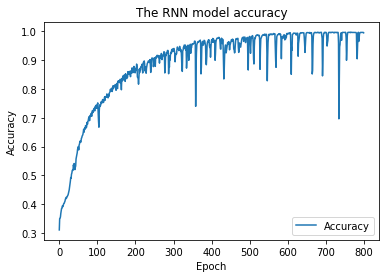


Final Cross-Validation Accuracy of RNN training model 0.8562456381462374 



In [10]:
# Fit RNN Model and Cross-Validation.

RNN_history = RNN_model.fit(X_train, target_train, epochs=800, batch_size=64)

loss, accuracy = RNN_model.evaluate(X_test, target_test, verbose=1)
print('\nTesting Accuracy =', accuracy, '\n')

print(RNN_history.history.keys())
plt.plot(RNN_history.history['acc'])
#plt.plot(history.history['loss'])
plt.title('The RNN model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='lower right')
plt.show()

print('\nFinal Cross-Validation Accuracy of RNN training model', accuracy, '\n')
